In [69]:
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns

In [70]:
m = 'models/wiki_vectors.tsv'
X = pd.read_csv(m, sep='\t', index_col=0, header=None)

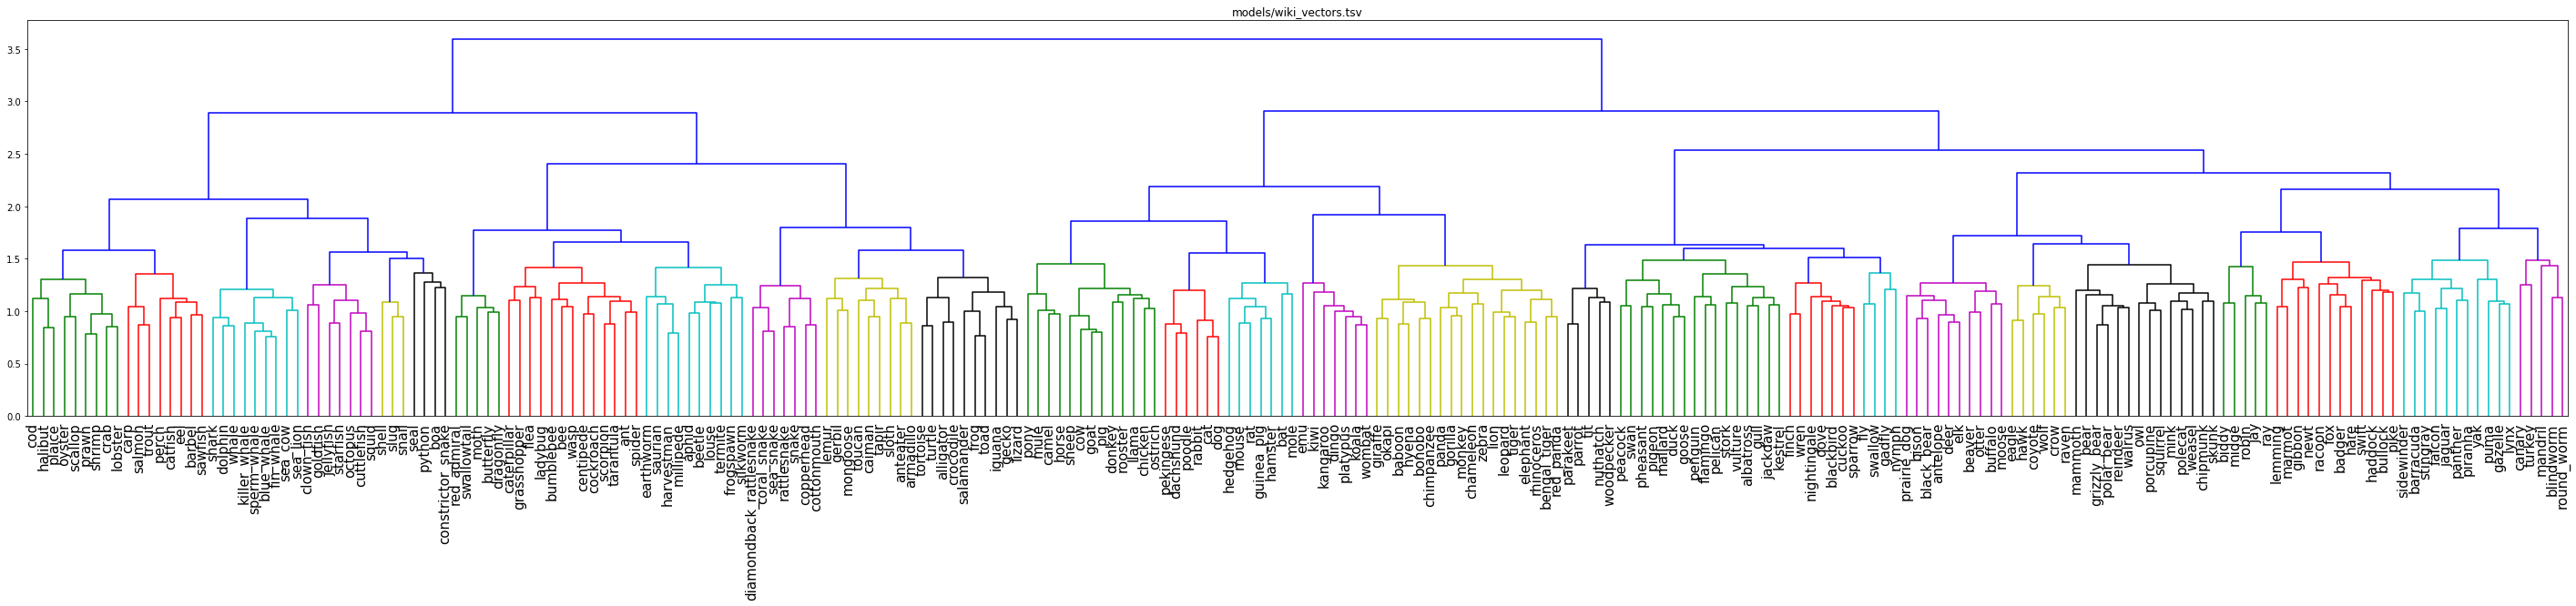

In [7]:
from scipy.cluster.hierarchy import fcluster
linked = linkage(X, method='ward')

plt.figure(figsize=(50,8))
dendrogram(linked,
           orientation='top',
           labels=X.index,
           color_threshold=1.5,
           distance_sort='descending',
           show_leaf_counts=True)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=15)
plt.title(m)
figname = m.split('_')[-1].split('.')[0]
plt.savefig(f'figures/{figname}.png')

In [93]:
assignments = fcluster(linked, t=1.5, criterion='distance')

In [94]:
outdf = pd.DataFrame(zip(X.index, assignments))
outdf.columns = ['animal','cluster']

In [95]:
outdf.to_csv('models/wiki_cluster.tsv', sep='\t', index=False)